In [114]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import pandas as pd

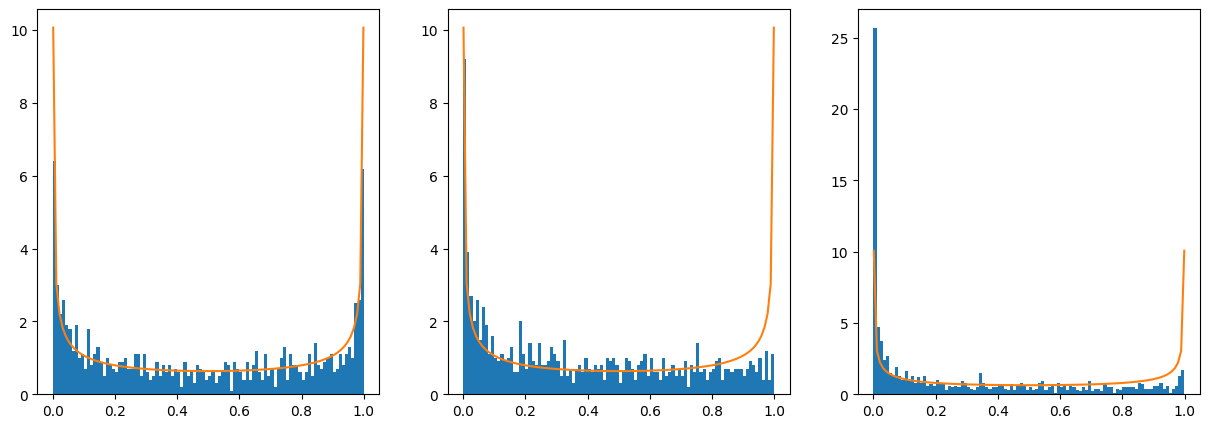

In [45]:
#1 (a)
#параметры
n = 1000
N = 1000
fig,ax = plt.subplots(1,3,figsize=(15,5))

#ПССБ
t = np.zeros(N) #последнее достижение нуля
for i in range(N):
    X = scipy.stats.bernoulli.rvs(1/2,size=n)*2 - 1
    S = np.cumsum(X)
    S = np.insert(S,0,0)
    t[i] =np.argwhere(S == 0)[-1][0]
ax[0].hist(t/n,bins=100,density=True)

x = np.linspace(0.001,0.999,100) #плотность арксинуса
y = 1/(np.pi * np.sqrt(x*(1-x)))
ax[0].plot(x,y)

#СБ0 Коши со средним 0
t = np.zeros(N)
for i in range(N):
    X = scipy.stats.cauchy.rvs(size=n)
    S = np.cumsum(X)
    S = np.insert(S,0,0)
    for j in range(n):
        if S[j]*S[j+1] < 0:
            t[i] = -(S[j]-(S[j+1]-S[j])/(j+1-j)*j) / ((S[j+1]-S[j])/(j+1-j)) # линейная функция пересекает 0
ax[1].hist(t/n,bins=100,density=True)
ax[1].plot(x,y)

#СБ Коши со средним не 0
t = np.zeros(N)
for i in range(N):
    X = scipy.stats.cauchy.rvs(loc=1,size=n)
    S = np.cumsum(X)
    S = np.insert(S,0,0)
    for j in range(n):
        if S[j]*S[j+1] <= 0:
            t[i] = -(S[j]-(S[j+1]-S[j])/(j+1-j)*j) / ((S[j+1]-S[j])/(j+1-j)) # линейная функция пересекает 0
ax[2].hist(t/n,bins=100,density=True)
ax[2].plot(x,y)
plt.show()

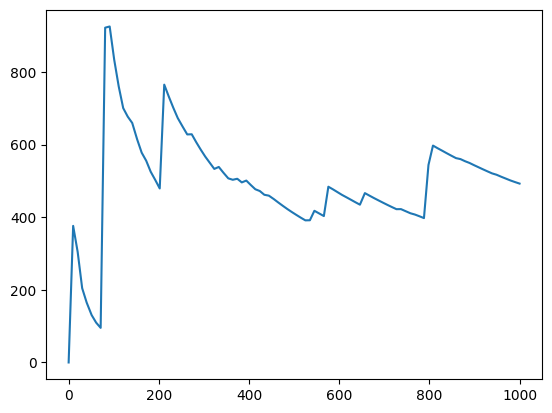

In [89]:
#2
#параметры
n = 1000
n_x = np.round(np.linspace(0,n,round(n/10)))
n_y = np.zeros(1)

#генерируем
k = 0 #количество возвращений
S = 0 #блуждание
l = 0 #длина возвращения
t = np.zeros(n)#длины возвращения

while k < n:
    X = scipy.stats.bernoulli.rvs(1/2)*2 - 1
    S = S + X
    l += 1
    if S == 0:
        t[k] = l
        l = 0
        k += 1
        if k in n_x and k > 0: #запомнить среднее
            n_y = np.append(n_y,np.sum(t)/k)
        
plt.plot(n_x,n_y)
plt.show()

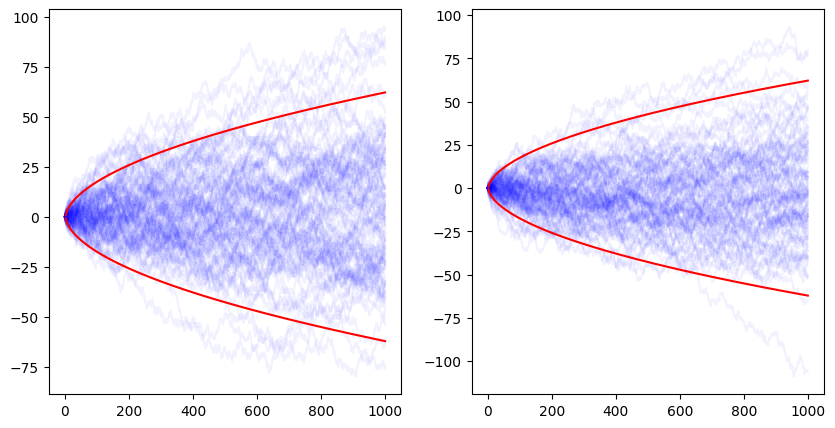

In [112]:
#3
#параметры
n = 1000
N = 100
n_x = np.arange(3,n+1)
n_y = np.sqrt(2*n_x*np.log(np.log(n_x)))
S = np.zeros(N,dtype=object)
fig,ax = plt.subplots(1,2,figsize=(10,5))

#ПССБ
for i in range(N):
    S[i] = np.cumsum(scipy.stats.bernoulli.rvs(1/2,size=n)*2-1)
    S[i] = np.insert(S[i],0,0)
    ax[0].plot(np.arange(n+1),S[i],color='blue',alpha=0.05)
ax[0].plot(n_x, n_y,color='red')
ax[0].plot(n_x, -n_y,color='red')

#СБ N(0,1)
for i in range(N):
    S[i] = np.cumsum(scipy.stats.norm.rvs(size=n))
    S[i] = np.insert(S[i],0,0)
    ax[1].plot(np.arange(n+1),S[i],color='blue',alpha=0.05)
ax[1].plot(n_x, n_y,color='red')
ax[1].plot(n_x, -n_y,color='red')
plt.show()

In [128]:
#4
#параметры
n = 1000
p = 1/2
A = 10

#моделируем игру
#(a)
B = 3 * A / 2
theor_lose_pr = (B-A)/B
lost = 0
time = np.zeros(n)
for i in range(n):
    bank = A
    while bank > 0 and bank < B:
        bank += scipy.stats.bernoulli.rvs(p)*2-1
        time[i] += 1
    if bank == 0:
        lost += 1
res = np.array([[theor_lose_pr,lost/n],[A*(B-A),time.mean()]])
print('(a)')
print(pd.DataFrame(res,index=['p','E'],columns=['теоретические','эмпирические']),'\n')

#(b)
B = 2 * A
theor_lose_pr = (B-A)/B
lost = 0
time = np.zeros(n)
for i in range(n):
    bank = A
    while bank > 0 and bank < B:
        bank += scipy.stats.bernoulli.rvs(p)*2-1
        time[i] += 1
    if bank == 0:
        lost += 1
res = np.array([[theor_lose_pr,lost/n],[A*(B-A),time.mean()]])
print('(b)')
print(pd.DataFrame(res,index=['p','E'],columns=['теоретические','эмпирические']),'\n')

#(c)
B = 10 * A
theor_lose_pr = (B-A)/B
lost = 0
time = np.zeros(n)
for i in range(n):
    bank = A
    while bank > 0 and bank < B:
        bank += scipy.stats.bernoulli.rvs(p)*2-1
        time[i] += 1
    if bank == 0:
        lost += 1
res = np.array([[theor_lose_pr,lost/n],[A*(B-A),time.mean()]])
print('(c)')
print(pd.DataFrame(res,index=['p','E'],columns=['теоретические','эмпирические']))

(a)
   теоретические  эмпирические
p       0.333333         0.329
E      50.000000        49.461 

(b)
   теоретические  эмпирические
p            0.5         0.513
E          100.0       100.126 

(c)
   теоретические  эмпирические
p            0.9         0.901
E          900.0       870.066
